In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
# Load the dataset 
df = pd.read_csv("Amazon_Sales_Data.csv")
df.head()


,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,1/1/2019,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,1/1/2019,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,1/2/2019,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,1/4/2019,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Seriousz,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,1/4/2019,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


In [5]:
# shows first five records
df.head()

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,1/1/2019,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,1/1/2019,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,1/2/2019,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,1/4/2019,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Seriousz,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,1/4/2019,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


### Cleaning and processing the dataset

In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Region',
       'Product Category', 'Product Name', 'Quantity Sold', 'Unit Price',
       'Discount (%)', 'Salesperson', 'Payment Method', 'Order Status',
       'Total Sales', 'Profit Margin'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          5000 non-null   object 
 1   Order Date        5000 non-null   object 
 2   Customer ID       5000 non-null   object 
 3   Customer Name     5000 non-null   object 
 4   Region            5000 non-null   object 
 5   Product Category  5000 non-null   object 
 6   Product Name      4999 non-null   object 
 7   Quantity Sold     5000 non-null   int64  
 8   Unit Price        5000 non-null   float64
 9   Discount (%)      5000 non-null   float64
 10  Salesperson       5000 non-null   object 
 11  Payment Method    5000 non-null   object 
 12  Order Status      5000 non-null   object 
 13  Total Sales       5000 non-null   float64
 14  Profit Margin     5000 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 586.1+ KB


###### Separate the columns

In [8]:
# seprate numarical column
num_col=df.select_dtypes(include=["int","float"]).columns
num_col

Index(['Quantity Sold', 'Unit Price', 'Discount (%)', 'Total Sales',
       'Profit Margin'],
      dtype='object')

In [9]:
# seprate the categorical columns
cat_col=df.select_dtypes(include=["object"]).columns
cat_col

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Region',
       'Product Category', 'Product Name', 'Salesperson', 'Payment Method',
       'Order Status'],
      dtype='object')

In [10]:
#check statistical info about cat column
df.describe(include="object")

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Salesperson,Payment Method,Order Status
count,5000,5000,5000,5000,5000,5000,4999,5000,5000,5000
unique,5000,1961,5000,4834,5,7,965,20,5,4
top,162896b1-885c-4633-9bde-a20252bc99a3,8/8/2022,15e5a6f8-dcc3-444f-b3bf-451c2bca202d,Jennifer Wright,Asia,Sports,Present,Crystal Williams,Debit Card,Returned
freq,1,9,1,4,1055,735,14,270,1043,1325


#### Handling missing Value

In [11]:
df.isnull().sum()/len(df)*100

Order ID            0.00
Order Date          0.00
Customer ID         0.00
Customer Name       0.00
Region              0.00
Product Category    0.00
Product Name        0.02
Quantity Sold       0.00
Unit Price          0.00
Discount (%)        0.00
Salesperson         0.00
Payment Method      0.00
Order Status        0.00
Total Sales         0.00
Profit Margin       0.00
dtype: float64

In [12]:
# in a product name column there are 0.02% null value so we can fill the null value with "Unknown".
df["Product Name"].fillna("Unknown",inplace=True)

In [13]:
df.isnull().sum()/len(df)*100

Order ID            0.0
Order Date          0.0
Customer ID         0.0
Customer Name       0.0
Region              0.0
Product Category    0.0
Product Name        0.0
Quantity Sold       0.0
Unit Price          0.0
Discount (%)        0.0
Salesperson         0.0
Payment Method      0.0
Order Status        0.0
Total Sales         0.0
Profit Margin       0.0
dtype: float64

##### handling categorical colum

In [14]:
cat_col

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Region',
       'Product Category', 'Product Name', 'Salesperson', 'Payment Method',
       'Order Status'],
      dtype='object')

In [15]:
df["Order ID"].nunique()

5000

In [16]:
df["Order Date"].unique()

array(['1/1/2019', '1/2/2019', '1/4/2019', ..., '12/28/2024',
       '12/29/2024', '12/31/2024'], dtype=object)

In [17]:
df["Customer ID"].unique()

array(['48aa940a-5cb5-4103-8d89-19c10fd26aaf',
       '8de3545c-78e6-4962-ace5-02e37fe1ce91',
       '6ac41f61-acf6-4e46-8b70-ad00ce01c9d0', ...,
       'b779f378-12b7-4513-b676-6067973a18cd',
       '8cfea582-773c-4127-ae0f-e63bcdd98707',
       '15e5a6f8-dcc3-444f-b3bf-451c2bca202d'], dtype=object)

In [18]:
df["Customer Name"].unique()

array(['Stephanie Garcia', 'Jacob Morales', 'John Carroll', ...,
       'Nicole Gutierrez', 'Matthew Brooks', 'Monica Riley'], dtype=object)

In [19]:
df["Region"].unique()

array(['South America', 'North America', 'Asia', 'Europe', 'Australia'],
      dtype=object)

In [20]:
df["Product Category"].unique()

array(['Home & Kitchen', 'Books', 'Sports', 'Toys', 'Beauty',
       'Electronics', 'Clothing'], dtype=object)

In [21]:
df["Product Name"].unique()

array(['Speak', 'If', 'Big', 'Seriousz', 'Operation', 'Game', 'Scientist',
       'Eight', 'Stage', 'Discuss', 'Return', 'Building', 'World',
       'Catch', 'Animal', 'Be', 'Full', 'Crime', 'Seven', 'With', 'Goal',
       'Story', 'Magazine', 'Green', 'We', 'Agreement', 'Listen', 'Claim',
       'Avoid', 'Attorney', 'Bill', 'Moment', 'Almost', 'Bank', 'Picture',
       'Fact', 'Those', 'Feel', 'Summer', 'Group', 'Tv', 'Business',
       'Pressure', 'Establish', 'Ahead', 'Member', 'Stay', 'Wrong', 'Or',
       'Heart', 'Test', 'Might', 'Mouth', 'Everything', 'Prevent',
       'Hospital', 'News', 'Strategy', 'Ball', 'Civil', 'Never',
       'Because', 'Agency', 'My', 'West', 'Similar', 'Go', 'Surface',
       'Sense', 'Determine', 'And', 'Offer', 'Clearly', 'Poor', 'Me',
       'Growth', 'Help', 'Film', 'Car', 'Administration', 'TRUE',
       'Suffer', 'Us', 'Institution', 'While', 'Treat', 'Matter',
       'Design', 'Have', 'Rule', 'Trouble', 'Effect', 'Man', 'Series',
       'Both', '

In [22]:
product_dict = {
    'Electronics': ['Laptop','Mobile','Headphones','Camera','Tablet'],
    'Clothing': ['T-Shirt','Jeans','Jacket','Shirt','Sweater'],
    'Home': ['Mixer','Sofa','Chair','Lamp','Table'],
    'Sports': ['Cricket Bat','Football','Tennis Racket','Gloves','Helmet']
}


In [23]:
def assign_product(cat):
    if cat in product_dict:
        return random.choice(product_dict[cat])
    else:
        return 'Other Item'


In [24]:
df['Product Name'] = df['Product Category'].apply(assign_product)


In [25]:
df["Product Name"].value_counts()

Product Name
Other Item       2810
Helmet            158
Mobile            157
Jeans             157
Tennis Racket     157
Headphones        156
Jacket            153
Football          151
Sweater           148
Cricket Bat       146
Shirt             144
Camera            143
Laptop            143
T-Shirt           133
Gloves            123
Tablet            121
Name: count, dtype: int64

In [26]:
df["Salesperson"].unique()

array(['Johnny Marshall', 'Bradley Howe', 'Roger Brown', 'Kristen Ramos',
       'Steven Coleman', 'Sandra Luna', 'Caleb Camacho', 'Adam Smith',
       'Jason Nelson', 'Christina Thompson', 'Crystal Williams',
       'Caitlyn Boyd', 'Michelle Andersen', 'Charles Smith',
       'Susan Edwards', 'Joseph Brooks', 'Diane Andrews',
       'Michelle Garza', 'Mary Scott', 'Emily Matthews'], dtype=object)

In [27]:
df["Payment Method"].unique()

array(['Debit Card', 'Gift Card', 'Amazon Pay', 'PayPal', 'Credit Card'],
      dtype=object)

In [28]:
df["Order Status"].unique()

array(['Returned', 'Pending', 'Completed', 'Cancelled'], dtype=object)

#### handling numerical columns
Understand distributions & outliers




In [29]:
df.describe()

,Quantity Sold,Unit Price,Discount (%),Total Sales,Profit Margin
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.518800,255.161728,14.899920,1187.145384,413.072520
std,2.896088,143.167691,8.705621,988.464586,343.940683
min,1.000000,5.160000,0.000000,4.610000,1.600000
25%,3.000000,130.112500,7.237500,370.127500,128.787500
50%,6.000000,257.080000,14.870000,907.955000,315.930000
75%,8.000000,379.710000,22.442500,1762.252500,613.180000
max,10.000000,499.910000,29.990000,4911.920000,1709.120000


##### Distribution analysis shows that Quantity Sold, Unit Price, and Discount are relatively symmetric, indicating stable purchasing and pricing patterns. In contrast, Total Sales and Profit Margin exhibit right-skewed distributions, suggesting the presence of high-value transactions contributing disproportionately to revenue and profitability. This indicates opportunities for customer segmentation and targeted marketing toward high-spending segments.

##### outliers detection

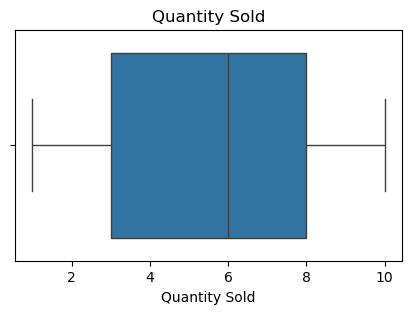

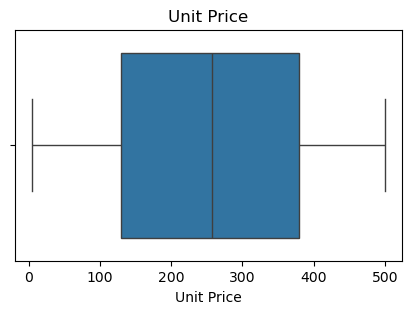

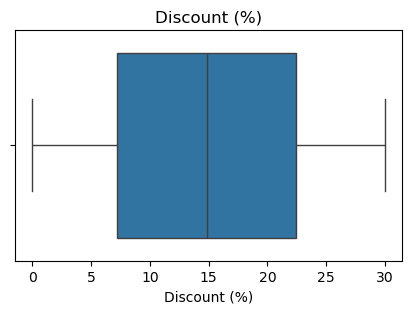

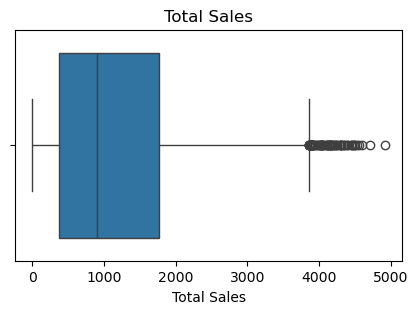

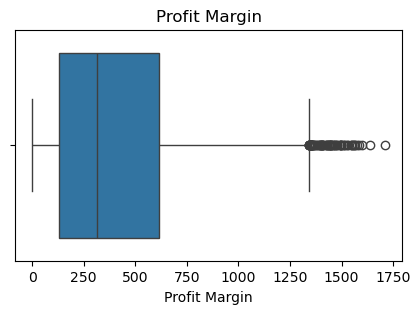

In [30]:
for col in num_col:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()



### Exploratory Data Analysis

### Correlation Analysis (numarical column)

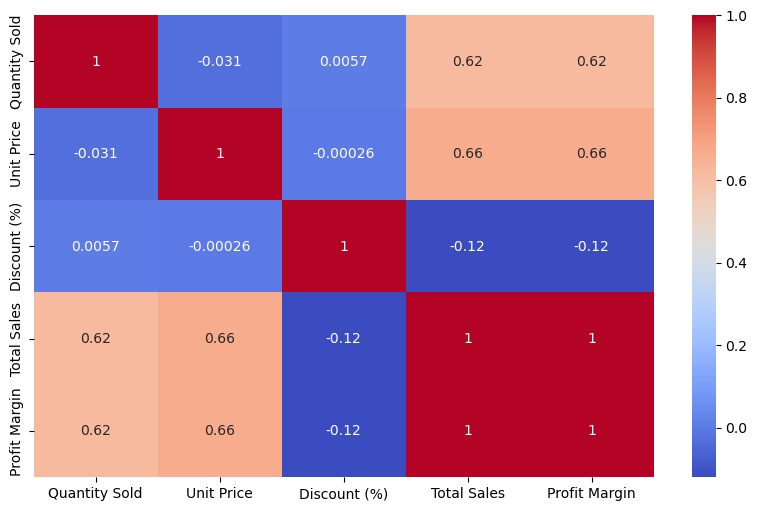

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.show()


#### Correlation analysis shows that Total Sales increases with Quantity Sold and Unit Price, while higher discounts reduce Profit Margin. This indicates businesses should carefully manage discounts to maintain profitability. Overall, revenue variables show strong relationships, while others are relatively independent.

### Bivariate Analysis

#### Sales vs profit analysis

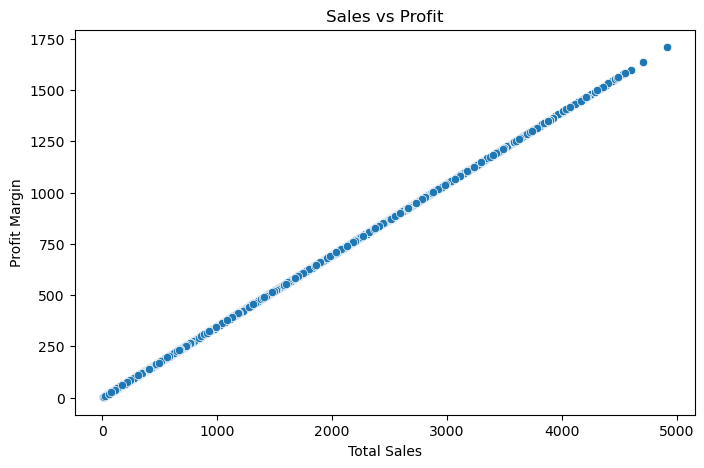

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Total Sales', y='Profit Margin')
plt.title("Sales vs Profit")
plt.show()


##### The scatter plot between Total Sales and Profit Margin shows a positive relationship, indicating that higher sales generally lead to higher profit. However, some variations suggest that discounts and pricing strategies influence profitability. This highlights that increasing sales alone does not always guarantee proportional profit growth.

#### Category vs Sales analysis

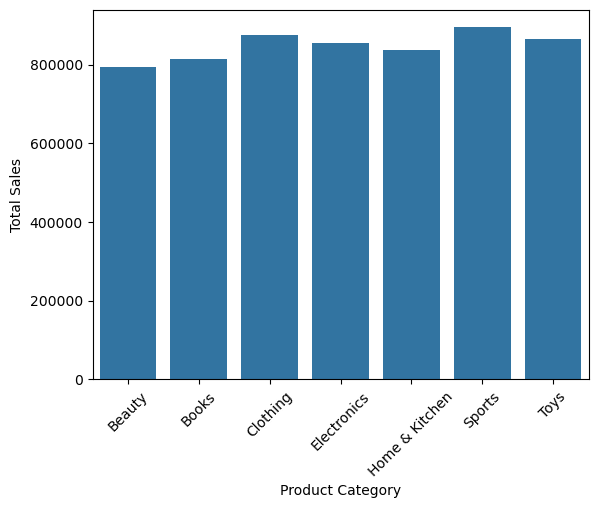

In [33]:
cat_sales = df.groupby('Product Category')['Total Sales'].sum().reset_index()
sns.barplot(data=cat_sales, x='Product Category', y='Total Sales')
plt.xticks(rotation=45)
plt.show()


##### The category-wise sales analysis shows that certain product categories contribute more to overall revenue than others. This helps identify top-performing categories and areas requiring marketing or pricing improvements. Understanding category performance supports better inventory and business planning decisions

In [35]:
df.to_excel("Updated_amazon_Sales.xlsx", index=False)


In [37]:
df=pd.read_excel("Updated_amazon_Sales.xlsx")
df

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,1/1/2019,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Other Item,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,1/1/2019,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,Other Item,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,1/2/2019,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Football,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,1/4/2019,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Other Item,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,1/4/2019,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Other Item,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,f04ea28d-b565-4b83-b437-2538896b384b,12/29/2024,dbf0aed0-1c92-4d1a-8489-a84822d4849f,Shannon Stewart,Europe,Beauty,Other Item,10,347.12,23.48,Charles Smith,Amazon Pay,Pending,2656.16,924.22
4996,ccea564f-7638-4ebe-a058-652574e18dc8,12/29/2024,f2ed5398-d529-48c0-b2d2-884772b92195,Joanna Wiley,South America,Sports,Gloves,4,235.03,3.43,Steven Coleman,Debit Card,Completed,907.87,315.90
4997,782f9ad0-f6fe-4caa-bafa-c9743cc56714,12/31/2024,b779f378-12b7-4513-b676-6067973a18cd,Nicole Gutierrez,North America,Beauty,Other Item,4,259.32,10.51,Johnny Marshall,PayPal,Returned,928.26,322.99
4998,dc695111-fe52-4865-9857-73fe451aa30f,12/31/2024,8cfea582-773c-4127-ae0f-e63bcdd98707,Matthew Brooks,North America,Home & Kitchen,Other Item,7,29.60,18.10,Charles Smith,Debit Card,Cancelled,169.70,59.05
